## Import Packages

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Reduce memory usage

In [107]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

### Load data

In [108]:
orders = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/orders.csv'))
order_products_prior = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/order_products__prior.csv'))
order_products_train = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/order_products__train.csv'))
products = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/products.csv'))
departments = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/departments.csv'))
aisles = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/aisles.csv'))

Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%
Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 340.25 MB
Decreased by 65.6%
Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%
Memory usage of dataframe is 1.52 MB
Memory usage after optimization is: 1.91 MB
Decreased by -25.8%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by -92.7%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.01 MB
Decreased by -159.9%


In [109]:
print(orders.shape)
print(order_products_prior.shape)
print(order_products_train.shape)
print(products.shape)
print(departments.shape)
print(aisles.shape)

(3421083, 7)
(32434489, 4)
(1384617, 4)
(49688, 4)
(21, 2)
(134, 2)


In [110]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [111]:
prior_df = orders[orders.eval_set == 'prior']

In [112]:
temp = reduce_mem_usage(pd.merge(left=prior_df, right=order_products_prior, on='order_id'))
temp.head()

Memory usage of dataframe is 897.03 MB
Memory usage after optimization is: 897.03 MB
Decreased by 0.0%


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


<AxesSubplot:xlabel='order_hour_of_day', ylabel='Count'>

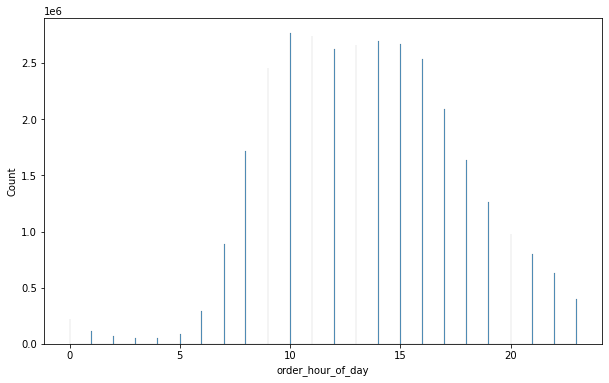

In [113]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.histplot(x='order_hour_of_day',data=temp)

In [114]:
temp2 = reduce_mem_usage(pd.merge(left=products, right=aisles, on='aisle_id'))
temp3 = reduce_mem_usage(pd.merge(left=temp2, right=departments, on='department_id'))
temp3

Memory usage of dataframe is 2.39 MB
Memory usage after optimization is: 2.39 MB
Decreased by 0.0%
Memory usage of dataframe is 2.44 MB
Memory usage after optimization is: 2.44 MB
Decreased by 0.0%


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [115]:
final_prior_df = reduce_mem_usage(pd.merge(left=temp, right=temp3, on='product_id'))

Memory usage of dataframe is 1207.74 MB
Memory usage after optimization is: 1207.74 MB
Decreased by 0.0%


In [116]:
final_prior_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle', 'department'],
      dtype='object')

In [117]:
final_prior_df.shape

(32434489, 15)

In [118]:
final_prior_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [119]:
final_prior_df['department'].value_counts().sort_values(ascending=True)

bulk                 34573
other                36291
missing              69145
pets                 97724
alcohol             153696
international       269253
babies              423802
personal care       447123
meat seafood        708931
breakfast           709569
household           738666
dry goods pasta     866627
deli               1051249
canned goods       1068058
bakery             1176787
pantry             1875577
frozen             2236432
beverages          2690129
snacks             2887550
dairy eggs         5414016
produce            9479291
Name: department, dtype: int64

### Getting only 20,000 orders (randomly) from the five most ordered categories

In [120]:
#sample 20,000 of produce
final_prior_df_produce = final_prior_df[final_prior_df.department == 'produce']
rows = np.random.choice(final_prior_df_produce.index.values, 20000)
sampled_produce = final_prior_df_produce.loc[rows]
sampled_produce.shape

(20000, 15)

In [121]:
#sample 20,000 of dairy eggs
final_prior_df_dairyeggs = final_prior_df[final_prior_df.department == 'dairy eggs']
rows = np.random.choice(final_prior_df_dairyeggs.index.values, 20000)
sampled_dairyeggs = final_prior_df_dairyeggs.loc[rows]
sampled_dairyeggs.shape

(20000, 15)

In [122]:
#sample 20,000 of snacks
final_prior_df_snacks = final_prior_df[final_prior_df.department == 'snacks']
rows = np.random.choice(final_prior_df_snacks.index.values, 20000)
sampled_snacks = final_prior_df_snacks.loc[rows]
sampled_snacks.shape

(20000, 15)

In [123]:
#sample 20,000 of beverages
final_prior_df_beverages = final_prior_df[final_prior_df.department == 'beverages']
rows = np.random.choice(final_prior_df_beverages.index.values, 20000)
sampled_beverages = final_prior_df_beverages.loc[rows]
sampled_beverages.shape

(20000, 15)

In [124]:
#sample 20,000 of frozen
final_prior_df_frozen = final_prior_df[final_prior_df.department == 'frozen']
rows = np.random.choice(final_prior_df_frozen.index.values, 20000)
sampled_frozen = final_prior_df_frozen.loc[rows]
sampled_frozen.shape

(20000, 15)

In [125]:
print(sampled_produce.shape)
print(sampled_dairyeggs.shape)
print(sampled_snacks.shape)
print(sampled_beverages.shape)
print(sampled_frozen.shape)

(20000, 15)
(20000, 15)
(20000, 15)
(20000, 15)
(20000, 15)


In [126]:
# append all product, dairy egg, snacks, beverages, and frozen together
frame = [sampled_produce,sampled_dairyeggs,sampled_snacks,sampled_beverages,sampled_frozen]
myDataFrame = reduce_mem_usage(pd.DataFrame())
for df in frame:
    myDataFrame = myDataFrame.append(df)
#final_prior_df_appended = final_prior_df_produce.append(final_prior_df_dairyeggs,final_prior_df_snacks,final_prior_df_beverages,final_prior_df_frozen,final_prior_df_pantry,final_prior_df_bakery,final_prior_df_cannedgoods,final_prior_df_deli,final_prior_df_meatseafood)

/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_10709/1144455515.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  start_mem = df.memory_usage().sum() / 1024**2
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_10709/1144455515.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  end_mem = df.memory_usage().sum() / 1024**2
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_10709/1144455515.py:36: RuntimeWarning: invalid value encountered in double_scalars
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
/var/folders/pv/3tp757f9271btvqh0thcbp4w0000gn/T/ipykernel_10709/2056993344.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by nan%


In [127]:
myDataFrame.shape

(100000, 15)

In [128]:
myDataFrame['department'].value_counts().sort_values(ascending=True)

pantry                 0
deli                   0
dry goods pasta        0
babies                 0
household              0
bulk                   0
international          0
missing                0
other                  0
canned goods           0
alcohol                0
pets                   0
bakery                 0
meat seafood           0
breakfast              0
personal care          0
beverages          20000
snacks             20000
produce            20000
dairy eggs         20000
frozen             20000
Name: department, dtype: int64

In [131]:
myDataFrame['product_name'].value_counts().sort_values(ascending=True)

Punjabi Chhole, Hot Spicy                                             0
Crunchy Cheetos Club Pack                                             0
Crunch Lemon Shortbread Flavor 0% Fat with Toppings Greek Yogurt      0
Crunch Donuts                                                         0
Crunch Chocolate Caramel Pretzel Greek Yogurt                         0
                                                                   ... 
Organic Strawberries                                                535
Organic Baby Spinach                                                560
Sparkling Water Grapefruit                                          613
Bag of Organic Bananas                                              779
Banana                                                              986
Name: product_name, Length: 49688, dtype: int64

In [133]:
myDataFrame.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
12223355,2657194,142053,prior,8,5,12,30.0,4605,10,1,Yellow Onions,83,4,fresh vegetables,produce
281406,2217359,118137,prior,2,1,16,0.0,13176,4,0,Bag of Organic Bananas,24,4,fresh fruits,produce
14873313,434260,194375,prior,31,4,8,2.0,47734,5,1,Organic Green Cabbage,83,4,fresh vegetables,produce
5395617,3334256,122525,prior,1,2,12,NaN,19678,27,0,Organic Russet Potato,83,4,fresh vegetables,produce
5848722,658328,129234,prior,3,1,6,30.0,26209,7,1,Limes,24,4,fresh fruits,produce


In [98]:
reduce_features_df = reduce_mem_usage(myDataFrame)

Memory usage of dataframe is 5.11 MB
Memory usage after optimization is: 5.11 MB
Decreased by 0.0%


In [99]:
reduce_features_df.isnull().sum()

order_id                     0
user_id                      0
eval_set                     0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order    6437
product_id                   0
add_to_cart_order            0
reordered                    0
product_name                 0
aisle_id                     0
department_id                0
aisle                        0
department                   0
dtype: int64

In [105]:
reduce_features_df.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
6532976,5,18,NaN,9,0,83,produce
14052175,0,12,21.0,6,0,83,produce
1469709,3,22,9.0,5,1,24,produce
4806914,0,9,12.0,4,1,83,produce
6032597,6,19,20.0,10,1,16,produce


### Using only meaningful features

In [100]:
reduce_features_df.drop(columns=['order_id',
                                 'user_id',
                                 'eval_set',
                                 'order_number',
                                 'product_id',
                                 'product_name',
                                 'department_id',
                                 'aisle',
                                ],inplace= True)

In [101]:
reduced_feature= reduce_features_df[:]

In [102]:
reduced_feature.shape

(100000, 7)

In [103]:
reduced_feature.tail(10)

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
32115615,6,18,22.0,15,0,116,frozen
29824234,0,10,2.0,12,0,37,frozen
9762157,0,14,30.0,1,0,116,frozen
9762981,2,12,12.0,1,1,116,frozen
13283972,4,18,8.0,5,1,34,frozen
9914718,1,13,5.0,3,1,79,frozen
13090371,6,22,6.0,22,0,116,frozen
18614908,6,13,5.0,14,1,116,frozen
13099477,6,14,10.0,3,1,42,frozen
25283005,5,16,13.0,9,1,79,frozen


In [104]:
#export dataframe to csv 
reduced_feature.to_csv(r'/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/dataset/instacart_100k_noonehot.csv', index=False) 